# 0-Notes

In [ ]:
# Notes:
# Model parameters to variate:
#     1. Data split proportion
#     2. Normalized/not normalized
#     3. Modell specific parameters
# Parameters to measure:
#     1. Accuracy, Recall, Precision, Specificity
# Add Recall, Precision, Specificity to model_check()

# 1-Data preparation

## 1-1-Import data

In [212]:
import pandas as pd

In [213]:
data = pd.read_csv('loan-default-iter2.csv', index_col='id')
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,loss
id,,,,,,,,,,,,,,,,,,,,,
1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,0.15,0.01,0.12,851.0,851.0,851.0,851.0,0.32,1.34,0
2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,0.29,0.09,0.08,20.0,20.0,20.0,20.0,0.28,1.43,0
3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,...,0.01,0.00,0.07,124.0,124.0,124.0,124.0,0.25,1.52,0
4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,...,0.01,0.00,0.12,903.0,903.0,903.0,903.0,0.32,1.35,0
5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,...,0.51,0.90,0.06,5.0,5.0,5.0,5.0,0.23,1.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79996,117,8,0.071314,1300,4,76831,4614.0,3102.0,120.50,117.52,...,0.26,0.09,0.09,422.0,422.0,422.0,422.0,0.29,1.41,0
79997,125,8,0.793560,1300,4,83549,1205.0,2950.0,124.11,124.77,...,0.03,0.00,0.10,117.0,117.0,117.0,117.0,0.30,1.37,0
79998,120,8,0.081656,1300,4,2572,6943.0,3734.0,122.16,120.45,...,0.08,0.00,0.10,671.0,671.0,671.0,671.0,0.30,1.37,0


## 1-2-create category paid/not paid

In [214]:
# function : paid/not paid based on loss
def convert_to_categorical(col): 
    if col == 0: 
        return 'paid' 
    else: 
        return 'not paid'
data['target'] = data['loss'].apply(convert_to_categorical)

In [215]:
import numpy as np
data['target'] = data['loss'].apply(convert_to_categorical)
data.target.value_counts()
# too many paid! not good for training the model!

paid        72703
not paid     7297
Name: target, dtype: int64

## 1-3-Drop columns with all zeros

In [216]:
# check columns with all zeros
is_filled_with_0 ={}
for column in data.columns[0:-2]:
    is_filled_with_0.update({column:data[data[column]==0].shape[0] == len(data)})
is_filled_with_0

{'f1': False,
 'f2': False,
 'f3': False,
 'f4': False,
 'f5': False,
 'f6': False,
 'f7': False,
 'f8': False,
 'f9': False,
 'f10': False,
 'f13': False,
 'f14': False,
 'f15': False,
 'f16': False,
 'f17': False,
 'f18': False,
 'f19': False,
 'f20': False,
 'f21': False,
 'f22': False,
 'f23': False,
 'f24': False,
 'f25': False,
 'f26': False,
 'f27': False,
 'f28': False,
 'f29': False,
 'f30': False,
 'f31': False,
 'f32': False,
 'f33': True,
 'f34': True,
 'f35': True,
 'f36': False,
 'f37': True,
 'f38': True,
 'f39': False,
 'f40': False,
 'f41': False,
 'f42': False,
 'f43': False,
 'f44': False,
 'f45': False,
 'f46': False,
 'f47': False,
 'f48': False,
 'f49': False,
 'f50': False,
 'f51': False,
 'f52': False,
 'f53': False,
 'f54': False,
 'f55': False,
 'f56': False,
 'f57': False,
 'f58': False,
 'f59': False,
 'f60': False,
 'f61': False,
 'f62': False,
 'f63': False,
 'f64': False,
 'f65': False,
 'f66': False,
 'f67': False,
 'f68': False,
 'f69': False,
 'f70': F

In [217]:
# drop columns with all zeros
for key in is_filled_with_0.keys():
    if is_filled_with_0[key] == True:
        data.drop(key,axis=1,inplace=True)

## 1-4-Drop columns with too many zeros(>70%)

In [218]:
# check null values, % in each column
null_values = (data.iloc[:,0:-2] == 0).sum(axis=0)/data.shape[0]*100
null_values.sort_values(ascending=False).head(30)

f83    73.85000
f93    73.64875
f70    11.07000
f69    10.23250
f30    10.03625
f29    10.03625
f27    10.03625
f24    10.03625
f28    10.03625
f18    10.00750
f15     9.98125
f14     9.92500
f17     9.88500
f20     9.57625
f25     8.79875
f22     8.67625
f21     8.47500
f32     4.96750
f72     2.60500
f40     2.09875
f50     1.91125
f89     1.49625
f87     1.49250
f84     1.49250
f85     1.49250
f86     1.49250
f88     1.49250
f99     1.39250
f94     1.38250
f97     1.38250
dtype: float64

In [219]:
# drop columns f83, f93 - too many zeros
data.drop(['f83','f93'],axis=1,inplace=True)

## 1-5-Drop duplicates

In [220]:
data.drop_duplicates()
# no duplicates!

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f94,f95,f96,f97,f98,f99,f100,loss,target
id,,,,,,,,,,,,,,,,,,,,,
1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,0.15,0.12,851.0,851.0,851.0,851.0,0.32,1.34,0,paid
2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,0.29,0.08,20.0,20.0,20.0,20.0,0.28,1.43,0,paid
3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,...,0.01,0.07,124.0,124.0,124.0,124.0,0.25,1.52,0,paid
4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,...,0.01,0.12,903.0,903.0,903.0,903.0,0.32,1.35,0,paid
5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,...,0.51,0.06,5.0,5.0,5.0,5.0,0.23,1.56,0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79996,117,8,0.071314,1300,4,76831,4614.0,3102.0,120.50,117.52,...,0.26,0.09,422.0,422.0,422.0,422.0,0.29,1.41,0,paid
79997,125,8,0.793560,1300,4,83549,1205.0,2950.0,124.11,124.77,...,0.03,0.10,117.0,117.0,117.0,117.0,0.30,1.37,0,paid
79998,120,8,0.081656,1300,4,2572,6943.0,3734.0,122.16,120.45,...,0.08,0.10,671.0,671.0,671.0,671.0,0.30,1.37,0,paid


## 1-6-Check correlation

In [221]:
data_temp = data.copy()
data_temp['target_num'] = np.where(data['loss']>0, 1, 0)

In [222]:
correlation_matrix = data_temp.corr()
correlation_matrix

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f94,f95,f96,f97,f98,f99,f100,loss,target_num
f1,1.000000,-0.247156,-0.001845,0.794563,-0.330602,0.112862,-0.184160,-0.164189,0.974111,0.998744,...,0.010417,0.159813,-0.077806,-0.077806,-0.077806,-0.077806,0.105825,-0.160487,-0.006955,0.015164
f2,-0.247156,1.000000,0.000711,-0.252259,0.252693,0.084261,-0.109939,-0.149066,-0.286518,-0.255698,...,-0.016335,-0.228392,-0.173856,-0.173856,-0.173856,-0.173856,-0.210094,0.218223,-0.000676,-0.000445
f3,-0.001845,0.000711,1.000000,-0.001167,0.004881,0.001179,0.003829,-0.003993,-0.002101,-0.001946,...,0.000930,0.004331,0.004779,0.004779,0.004779,0.004779,0.004878,-0.004920,0.001611,0.004514
f4,0.794563,-0.252259,-0.001167,1.000000,-0.316336,0.130428,-0.252565,-0.199759,0.840515,0.805701,...,-0.003531,0.095729,-0.153029,-0.153029,-0.153029,-0.153029,0.045995,-0.087330,-0.004084,-0.004004
f5,-0.330602,0.252693,0.004881,-0.316336,1.000000,-0.057789,0.141042,0.015580,-0.347349,-0.334903,...,0.014671,-0.063476,0.082252,0.082252,0.082252,0.082252,-0.037612,0.058116,0.003553,0.015091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f98,-0.077806,-0.173856,0.004779,-0.153029,0.082252,-0.251359,0.951921,0.239673,-0.099195,-0.081788,...,0.098335,0.506656,1.000000,1.000000,1.000000,1.000000,0.469931,-0.502243,-0.002276,0.061381
f99,0.105825,-0.210094,0.004878,0.045995,-0.037612,-0.100724,0.370209,0.154811,0.100702,0.105428,...,0.154779,0.854244,0.469931,0.469931,0.469931,0.469931,1.000000,-0.985950,-0.001967,0.058946
f100,-0.160487,0.218223,-0.004920,-0.087330,0.058116,0.120202,-0.362391,-0.151266,-0.150852,-0.159522,...,-0.144674,-0.953477,-0.502243,-0.502243,-0.502243,-0.502243,-0.985950,1.000000,0.001818,-0.064509
loss,-0.006955,-0.000676,0.001611,-0.004084,0.003553,-0.003529,-0.000857,-0.003905,-0.005198,-0.006536,...,-0.002047,-0.001414,-0.002276,-0.002276,-0.002276,-0.002276,-0.001967,0.001818,1.000000,0.574480


In [223]:
# check correlation between param and target
correlation_matrix['target_num'].sort_values(ascending=False).head(30)

target_num    1.000000
loss          0.574480
f25           0.100145
f31           0.098009
f26           0.097614
f55           0.078683
f56           0.077952
f63           0.077328
f19           0.075730
f84           0.071579
f65           0.070136
f64           0.068551
f32           0.067455
f89           0.067149
f45           0.066428
f85           0.066031
f87           0.066031
f88           0.066031
f86           0.066031
f59           0.065847
f94           0.064612
f28           0.061768
f49           0.061412
f97           0.061381
f98           0.061381
f96           0.061381
f95           0.061381
f30           0.060806
f24           0.060393
f60           0.060099
Name: target_num, dtype: float64

In [224]:
# many features have correlation > 0.9!
list_corr = []
for row in correlation_matrix.index:
    for col in list(correlation_matrix.columns):
        if abs(correlation_matrix.loc[row,col]) > 0.9 and row != col:
            list_corr.append([row,col,correlation_matrix.loc[row,col]])
list_corr 

[['f1', 'f9', 0.9741109813268337],
 ['f1', 'f10', 0.9987444992933321],
 ['f7', 'f78', 0.9881538847206764],
 ['f7', 'f79', 0.9754388074186067],
 ['f7', 'f95', 0.9519208112922621],
 ['f7', 'f96', 0.9519208112922621],
 ['f7', 'f97', 0.9519208112922621],
 ['f7', 'f98', 0.9519208112922621],
 ['f9', 'f1', 0.9741109813268337],
 ['f9', 'f10', 0.9834956121795879],
 ['f10', 'f1', 0.9987444992933321],
 ['f10', 'f9', 0.9834956121795879],
 ['f13', 'f68', 0.9421821915281068],
 ['f14', 'f15', 0.9798737119953536],
 ['f14', 'f17', 0.9855264795066454],
 ['f14', 'f18', 0.9299801297829013],
 ['f14', 'f20', 0.9626250063243184],
 ['f14', 'f21', 0.9775498392137574],
 ['f14', 'f22', 0.9823625744570326],
 ['f14', 'f24', 0.9828618181906823],
 ['f14', 'f28', 0.9413514319980961],
 ['f14', 'f30', 0.9484772262176516],
 ['f14', 'f40', 0.9235351836172128],
 ['f14', 'f46', 0.9549740512242658],
 ['f14', 'f50', 0.9748100413969607],
 ['f14', 'f60', 0.9613276847420534],
 ['f15', 'f14', 0.9798737119953536],
 ['f15', 'f17',

## 1-7-Balance initial data set

In [225]:
data.target.value_counts()

paid        72703
not paid     7297
Name: target, dtype: int64

In [226]:
# how many not paid ?
data_not_paid = data[data['target'] == 'not paid']
lenth_not_paid = len(data_not_paid)

In [227]:
# take the same number like not paid in paid
data_paid = data[data['target'] == 'paid'].iloc[0:lenth_not_paid,:]

In [228]:
# connect paid/not paid and shuffle
data_50_50 = pd.concat([data_paid, data_not_paid], ignore_index=True)
data_50_50 = data_50_50.sample(frac=1).reset_index(drop=True)

## 1-8-Split data

In [229]:
# split balanced data 
from sklearn.model_selection import train_test_split

X_col = data.columns[0:-2]
y_col = 'target'

X = data_50_50[X_col]
y = data_50_50[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [230]:
# replace missing values with mean (from X_train) values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

X_train_transf = imputer.transform(X_train)
X_test_transf = imputer.transform(X_test)

# make dataframe (after splitting it is not a dataframe)
X_train = pd.DataFrame(X_train_transf, 
                                 columns=X_train.columns,
                                 index=X_train.index)
X_test = pd.DataFrame(X_test_transf, 
                                 columns=X_test.columns,
                                 index=X_test.index)

## 1-9-Normalize data

In [231]:
# min an max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train_sc = pd.DataFrame(scaler.transform(X_train))
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(scaler.transform(X_test))
X_test_sc.columns = X_test.columns

# 2-Applying models

## 2-0-Function: model_check()

In [ ]:
# create a function to check the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def model_check(y_true, y_pred, model): 
    acc_sc = accuracy_score(y_true, y_pred)
    #recall_sc= recall_score(y_true, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred))
    conf_matrix.set_index(model.classes_, inplace=True)
    conf_matrix.columns = model.classes_
    return conf_matrix, acc_sc

## 2-1-Decision tree

### 2-1-1-Modell

In [233]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [234]:
# train
model_check(y_train, tree.predict(X_train), tree)

(          not paid  paid
 not paid      3237  2235
 paid           844  4629,
 0.7186843307446322)

In [235]:
# test
model_check(y_test, tree.predict(X_test), tree)

(          not paid  paid
 not paid      1023   802
 paid           338  1486,
 0.6875856399013428)

### 2-1-2-Modell with normalization

In [236]:
tree.fit(X_train_sc, y_train)
model_check(y_train, tree.predict(X_train_sc), tree)

(          not paid  paid
 not paid      3237  2235
 paid           844  4629,
 0.7186843307446322)

In [237]:
model_check(y_test, tree.predict(X_test_sc), tree)

(          not paid  paid
 not paid      1025   800
 paid           339  1485,
 0.6878596875856399)

### 2-1-3-Accuracy/depth

In [274]:
# trying different depths
accuracy_depth_test = {}
accuracy_depth_train = {}
for i in range(2,16):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, tree.predict(X_train), tree)
    conf_matrix_test, acc_sc_test = model_check(y_test, tree.predict(X_test), tree)
    accuracy_depth_test[i] = acc_sc_test
    accuracy_depth_train[i] = acc_sc_tr

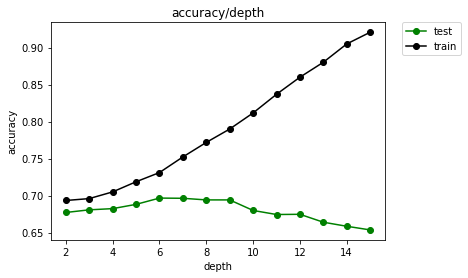

In [275]:
import matplotlib.pyplot as plt
x = accuracy_depth_test.keys()
y1 = accuracy_depth_test.values()
y2 = accuracy_depth_train.values()
plt.title("accuracy/depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [276]:
accuracy_depth_test

{2: 0.6771718278980543,
 3: 0.6807344477939161,
 4: 0.6823787338996985,
 5: 0.6881337352699369,
 6: 0.6966292134831461,
 7: 0.696355165798849,
 8: 0.6941627843244724,
 9: 0.6941627843244724,
 10: 0.6799123047410249,
 11: 0.6744313510550836,
 12: 0.6747053987393806,
 13: 0.6640175390517951,
 14: 0.6585365853658537,
 15: 0.6536037270485064}

## 2-2-KNN - K Nearest Neighbors

### 2-2-1-Modell

In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [241]:
# train 
model_check(y_train, knn.predict(X_train), knn)

(          not paid  paid
 not paid      4129  1343
 paid          2452  3021,
 0.6532663316582915)

In [242]:
# test
model_check(y_test, knn.predict(X_test), knn)

(          not paid  paid
 not paid      1146   679
 paid           992   832,
 0.5420663195395999)

### 2-2-2-Modell with normalization+

In [243]:
knn.fit(X_train_sc, y_train)
model_check(y_train, knn.predict(X_train_sc), knn)

(          not paid  paid
 not paid      4224  1248
 paid          1560  3913,
 0.7434444952032891)

In [244]:
model_check(y_test, knn.predict(X_test_sc), knn)

(          not paid  paid
 not paid      1261   564
 paid           656  1168,
 0.6656618251575774)

### 2-2-3-Accuracy/number of neighbors

In [245]:
# trying different number of neighbors
# trying different depths
accuracy_neighbor_test = {}
accuracy_neighbor_train = {}
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, knn.predict(X_train), knn)
    conf_matrix_test, acc_sc_test = model_check(y_test, knn.predict(X_test), knn)
    accuracy_neighbor_test[i] = acc_sc_test
    accuracy_neighbor_train[i] = acc_sc_tr

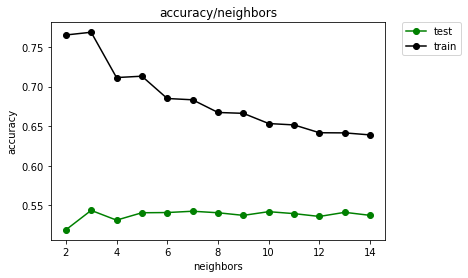

In [246]:
import matplotlib.pyplot as plt
x = accuracy_neighbor_test.keys()
y1 = accuracy_neighbor_test.values()
y2 = accuracy_neighbor_train.values()

plt.title("accuracy/neighbors")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [272]:
accuracy_neighbor_test

{2: 0.5190463140586462,
 3: 0.5437106056453823,
 4: 0.5313784598520143,
 5: 0.5406960811181145,
 6: 0.5409701288024116,
 7: 0.5426144149081941,
 8: 0.5406960811181145,
 9: 0.5374075089065498,
 10: 0.5420663195395999,
 11: 0.5395998903809263,
 12: 0.5360372704850644,
 13: 0.5412441764867086,
 14: 0.5374075089065498}

## 2-3-Logistic regression

### 2-3-1-Modell

In [248]:
from sklearn.linear_model import LogisticRegression

In [249]:
lg = LogisticRegression()
# Error while inserting scaled data
lg.fit(X_train, y_train)

LogisticRegression()

In [250]:
# train
model_check(y_train, lg.predict(X_train), lg)

(          not paid  paid
 not paid      3135  2337
 paid          2535  2938,
 0.5548652352672453)

In [251]:
# test
model_check(y_test, lg.predict(X_test), lg)

(          not paid  paid
 not paid      1017   808
 paid           923   901,
 0.5256234584817758)

### 2-3-2-Modell with normalization+

In [252]:
# repeat with scaled data!

In [253]:
lg.fit(X_train_sc, y_train)
model_check(y_train, lg.predict(X_train_sc), lg)

C:\Users\vital\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(          not paid  paid
 not paid      3749  1723
 paid          1371  4102,
 0.7173138419369575)

In [254]:
model_check(y_test, lg.predict(X_test_sc), lg)

(          not paid  paid
 not paid      1214   611
 paid           467  1357,
 0.704576596327761)

## 2-4-Random Forest

### 2-4-1-Modell

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
rf = RandomForestClassifier(max_depth=6, random_state=42)

In [257]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [258]:
# train
model_check(y_train, rf.predict(X_train), rf)

(          not paid  paid
 not paid      3995  1477
 paid          1252  4221,
 0.7506624029237094)

In [259]:
# test
model_check(y_test, rf.predict(X_test), rf)

(          not paid  paid
 not paid      1247   578
 paid           522  1302,
 0.6985475472732255)

### 2-4-2-Modell with normalization

In [260]:
# repeat with normalization

In [261]:
rf.fit(X_train_sc, y_train)
model_check(y_train, rf.predict(X_train_sc), rf)

(          not paid  paid
 not paid      3995  1477
 paid          1252  4221,
 0.7506624029237094)

In [262]:
model_check(y_test, rf.predict(X_test_sc), rf)

(          not paid  paid
 not paid      1247   578
 paid           522  1302,
 0.6985475472732255)

### 2-4-3-Accuracy/depth

In [277]:
# trying different depths
accuracy_depth_test = {}
accuracy_depth_train = {}
for i in range(2,15):
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    rf.fit(X_train, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, rf.predict(X_train), rf)
    conf_matrix_test, acc_sc_test = model_check(y_test, rf.predict(X_test), rf)
    accuracy_depth_test[i] = acc_sc_test
    accuracy_depth_train[i] = acc_sc_tr

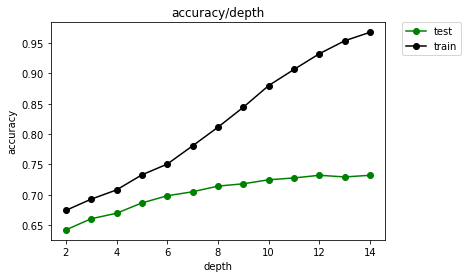

In [278]:
import matplotlib.pyplot as plt
x = accuracy_depth_test.keys()
y1 = accuracy_depth_test.values()
y2 = accuracy_depth_train.values()
plt.title("accuracy/depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [279]:
accuracy_depth_test

{2: 0.6423677719923266,
 3: 0.6607289668402302,
 4: 0.6697725404220334,
 5: 0.6867634968484516,
 6: 0.6985475472732255,
 7: 0.7051246916963552,
 8: 0.7144423129624554,
 9: 0.7182789805426144,
 10: 0.724856124965744,
 11: 0.7278706494930118,
 12: 0.7322554124417648,
 13: 0.7295149355987942,
 14: 0.7322554124417648}

## 2-5-Support Vector Machine

### 2-5-1-Modell

In [265]:
from sklearn.svm import SVC

In [266]:
svm = SVC(probability=True)

In [267]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [268]:
# train
model_check(y_train, svm.predict(X_train), svm)

(          not paid  paid
 not paid      2271  3201
 paid          1389  4084,
 0.5806304248515304)

In [269]:
# test
model_check(y_test, svm.predict(X_test), svm)

(          not paid  paid
 not paid       701  1124
 paid           519  1305,
 0.5497396546999178)

### 2-5-2-Modell with normalization+

In [270]:
svm.fit(X_train_sc, y_train)
model_check(y_train, svm.predict(X_train_sc), svm)

(          not paid  paid
 not paid      3532  1940
 paid          1090  4383,
 0.7231612608497031)

In [271]:
# test
model_check(y_test, svm.predict(X_test_sc), svm)

(          not paid  paid
 not paid      1115   710
 paid           390  1434,
 0.6985475472732255)